In [8]:
pip install openpyxl

   ---------------------------------------- 0.0/250.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/250.9 kB ? eta -:--:--
   ------ -------------------------------- 41.0/250.9 kB 653.6 kB/s eta 0:00:01
   ------------------- -------------------- 122.9/250.9 kB 1.0 MB/s eta 0:00:01
   --------------------------- ------------ 174.1/250.9 kB 1.2 MB/s eta 0:00:01
   ---------------------------------------- 250.9/250.9 kB 1.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
warnings.warn('DelftStack')
warnings.warn('Do not show this message')

In [12]:
data = pd.read_excel('AB_Test_Results.xlsx')

In [13]:
data.head()

,USER_ID,VARIANT_NAME,REVENUE
0,737,variant,0.0
1,2423,control,0.0
2,9411,control,0.0
3,7311,control,0.0
4,6174,variant,0.0


In [15]:
# Проверка на наличие дубликатов по 'USER_ID'
duplicates = data[data.duplicated(subset='USER_ID', keep=False)]

In [16]:
print("Дублирующиеся записи по user_id:")
print(duplicates)

Дублирующиеся записи по user_id:
      USER_ID VARIANT_NAME  REVENUE
0         737      variant      0.0
1        2423      control      0.0
2        9411      control      0.0
3        7311      control      0.0
6        2849      control      0.0
...       ...          ...      ...
9992     9303      variant      0.0
9993     2400      variant      0.0
9994     3129      control      0.0
9995     1981      control      0.0
9997     9214      variant      0.0

[6336 rows x 3 columns]


In [18]:
# Количество дубликатов по 'USER_ID'
num_duplicates = data.duplicated(subset='USER_ID', keep=False).sum()

# Общее количество записей
total_records = len(data)

# Процент дубликатов
duplicate_percentage = (num_duplicates / total_records) * 100

print(f'Количество дубликатов: {num_duplicates}')
print(f'Процент дубликатов: {duplicate_percentage:.2f}%')


Количество дубликатов: 6336
Процент дубликатов: 63.36%


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   USER_ID       10000 non-null  int64  
 1   VARIANT_NAME  10000 non-null  object 
 2   REVENUE       10000 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 234.5+ KB


# Филитрация данных по группе variant

In [21]:
#Фильтрация данных по группе 'variant':

variant_data = data[data['VARIANT_NAME'] == 'variant']

In [23]:
#Удаление дубликатов в 'variant':

variant_data_unique = variant_data.drop_duplicates(subset='USER_ID', keep='first')

In [24]:
#Обновление исходного DataFrame:

data_cleaned = pd.concat([variant_data_unique, data[data['VARIANT_NAME'] != 'variant']], ignore_index=True)

In [26]:
#Проверка результатов:

num_duplicates_after = data_cleaned.duplicated(subset='USER_ID', keep=False).sum()
total_records_after = len(data_cleaned)
duplicate_percentage_after = (num_duplicates_after / total_records_after) * 100

In [27]:
print(f'Количество дубликатов после удаления: {num_duplicates_after}')
print(f'Процент дубликатов после удаления: {duplicate_percentage_after:.2f}%')

Количество дубликатов после удаления: 4691
Процент дубликатов после удаления: 52.60%


# Фильтрация данных по контрольной группе control

In [29]:
#Фильтрация данных по контрольной группе 'control':

control_data = data[data['VARIANT_NAME'] == 'control']

In [32]:
#Удаление дубликатов в контрольной группе:

control_data_unique = control_data.drop_duplicates(subset='USER_ID', keep='first')

In [33]:
#Обновление исходного DataFrame:

data_cleaned = pd.concat([control_data_unique, data[data['VARIANT_NAME'] != 'control']], ignore_index=True)

In [34]:
#Проверка результатов:

num_duplicates_after = data_cleaned.duplicated(subset='USER_ID', keep=False).sum()
total_records_after = len(data_cleaned)
duplicate_percentage_after = (num_duplicates_after / total_records_after) * 100

In [35]:
print(f'Количество дубликатов после удаления в контрольной группе: {num_duplicates_after}')
print(f'Процент дубликатов после удаления в контрольной группе: {duplicate_percentage_after:.2f}%')

Количество дубликатов после удаления в контрольной группе: 4727
Процент дубликатов после удаления в контрольной группе: 52.83%



### Выводы:
1. **Общие данные:** Изначально во всем наборе данных было обнаружено значительное количество дубликатов - 63.36%.
2. **Эффективность фильтрации:** После удаления дубликатов в группе 'variant' и в контрольной группе 'control', процент дубликатов значительно снизился до примерно 52.60% и 52.83% соответственно.
3. **Рекомендации:** Продолжение мониторинга и обработки данных для улучшения качества и точности анализа. Возможно, стоит также рассмотреть причины возникновения дубликатов и попытаться предотвратить их появление на более ранних этапах сбора данных.

# Объеденение очищенных данных

In [48]:
# Объединение очищенных данных
data_cleaned = pd.concat([control_data_unique, variant_data_unique], ignore_index=True)

In [49]:
# Проверка количества дубликатов после очистки
num_duplicates_after = data_cleaned.duplicated(subset='USER_ID', keep=False).sum()
total_records_after = len(data_cleaned)
duplicate_percentage_after = (num_duplicates_after / total_records_after) * 100

In [50]:
print(f'Количество дубликатов после удаления: {num_duplicates_after}')
print(f'Процент дубликатов после удаления: {duplicate_percentage_after:.2f}%')

Количество дубликатов после удаления: 3082
Процент дубликатов после удаления: 39.19%


In [52]:
# Дополнительная информация для каждой группы
control_duplicates_after = control_data_unique.duplicated(subset='USER_ID', keep=False).sum()
variant_duplicates_after = variant_data_unique.duplicated(subset='USER_ID', keep=False).sum()

In [53]:
print(f'Количество дубликатов после удаления в контрольной группе: {control_duplicates_after}')
print(f'Количество дубликатов после удаления в группе "variant": {variant_duplicates_after}')

Количество дубликатов после удаления в контрольной группе: 0
Количество дубликатов после удаления в группе "variant": 0


In [54]:
data_cleaned.info

<bound method DataFrame.info of       USER_ID VARIANT_NAME  REVENUE
0        2423      control      0.0
1        9411      control      0.0
2        7311      control      0.0
3        2849      control      0.0
4        9168      control      0.0
...       ...          ...      ...
7860     2259      variant      0.0
7861     4883      variant      0.0
7862     8864      variant      0.0
7863     9303      variant      0.0
7864      502      variant      0.0

[7865 rows x 3 columns]>

In [55]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7865 entries, 0 to 7864
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   USER_ID       7865 non-null   int64  
 1   VARIANT_NAME  7865 non-null   object 
 2   REVENUE       7865 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 184.5+ KB


# Анализ

## 1. Статистика по доходам

In [56]:
# Статистики по доходам
revenue_stats = data_cleaned.groupby('VARIANT_NAME')['REVENUE'].describe()

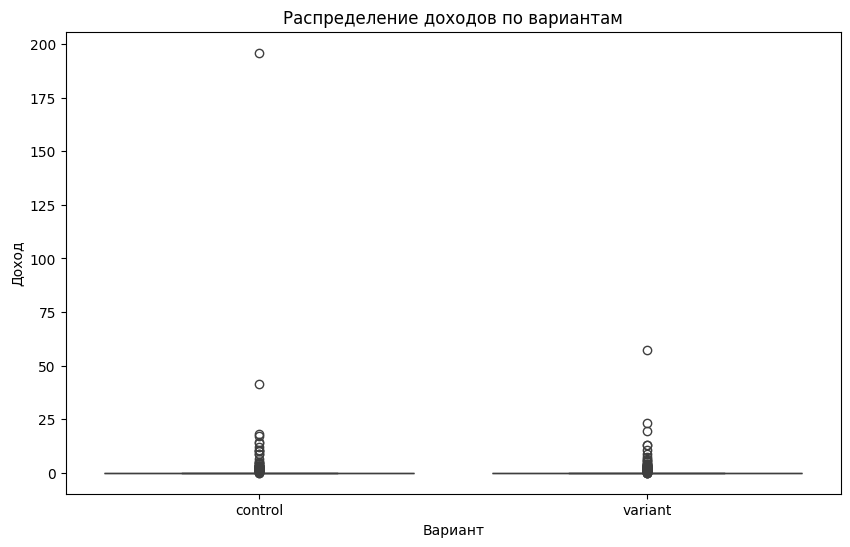

In [57]:
# Визуализация распределения доходов
plt.figure(figsize=(10, 6))
sns.boxplot(x='VARIANT_NAME', y='REVENUE', data=data_cleaned)
plt.title('Распределение доходов по вариантам')
plt.xlabel('Вариант')
plt.ylabel('Доход')
plt.show()

In [58]:
print("Статистика по доходам:")
print(revenue_stats)

Статистика по доходам:
               count      mean       std  min  25%  50%  75%     max
VARIANT_NAME                                                        
control       3931.0  0.115078  3.268799  0.0  0.0  0.0  0.0  196.01
variant       3934.0  0.064830  1.140386  0.0  0.0  0.0  0.0   57.46


## 2. Средний доход

In [59]:
# Средний доход по вариантам
mean_revenue = data_cleaned.groupby('VARIANT_NAME')['REVENUE'].mean()
print("Средний доход по вариантам:")
print(mean_revenue)

Средний доход по вариантам:
VARIANT_NAME
control    0.115078
variant    0.064830
Name: REVENUE, dtype: float64


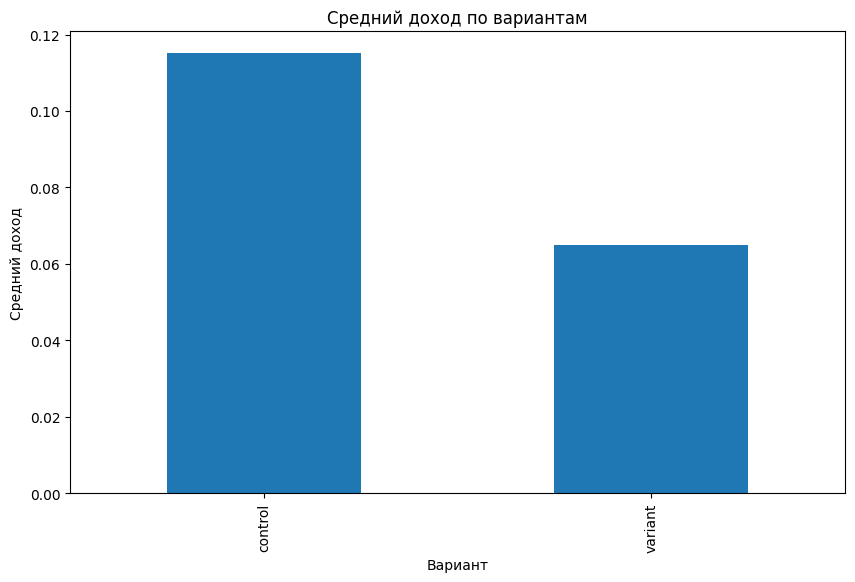

In [60]:
# Визуализация
plt.figure(figsize=(10, 6))
mean_revenue.plot(kind='bar')
plt.title('Средний доход по вариантам')
plt.xlabel('Вариант')
plt.ylabel('Средний доход')
plt.show()

## 3. Анализ количества уникальных пользователей по вариантам

In [61]:
# Количество уникальных пользователей по вариантам
unique_users = data_cleaned.groupby('VARIANT_NAME')['USER_ID'].nunique()
print("Количество уникальных пользователей по вариантам:")
print(unique_users)

Количество уникальных пользователей по вариантам:
VARIANT_NAME
control    3931
variant    3934
Name: USER_ID, dtype: int64


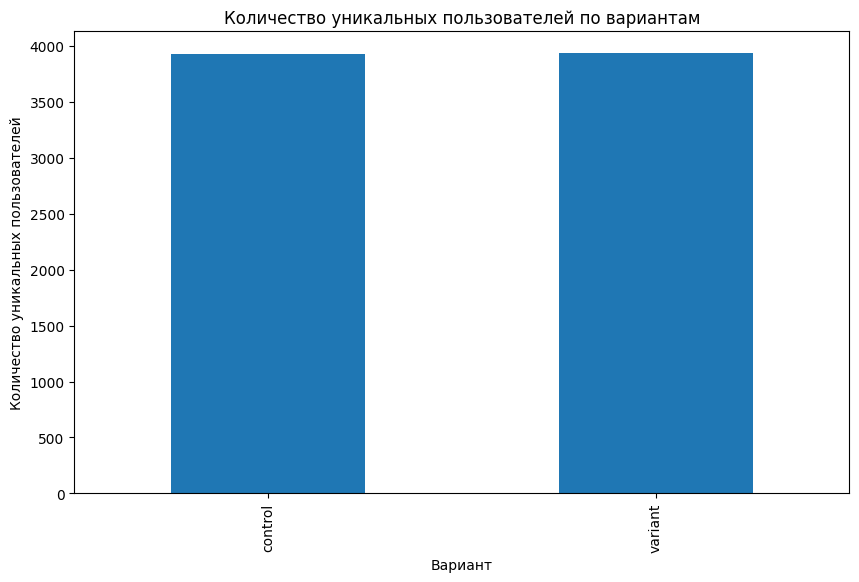

In [62]:
# Визуализация
plt.figure(figsize=(10, 6))
unique_users.plot(kind='bar')
plt.title('Количество уникальных пользователей по вариантам')
plt.xlabel('Вариант')
plt.ylabel('Количество уникальных пользователей')
plt.show()

## 4. Анализ влияния варианта на доход:

In [67]:
from scipy.stats import ttest_ind

In [65]:
# Доходы по вариантам
revenue_control = data_cleaned[data_cleaned['VARIANT_NAME'] == 'control']['REVENUE']
revenue_variant = data_cleaned[data_cleaned['VARIANT_NAME'] == 'variant']['REVENUE']

In [68]:
# t-тест для проверки значимости разницы
t_stat, p_value = ttest_ind(revenue_control, revenue_variant)
print("Результаты t-теста:")
print(f"t-статистика: {t_stat:.4f}, p-значение: {p_value:.4f}")

Результаты t-теста:
t-статистика: 0.9103, p-значение: 0.3627
